In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
sigma= 10
b= 8/3
r=28
x0=1
y0=1
z0=1

In [22]:
N=100000
tfinal=60
x= np.empty(N)
x[0]=x0
y= np.empty(N)
y[0]=y0
z= np.empty(N)
z[0]=z0
t = np.empty(N)
t[0] = 0
dt=tfinal/N

In [23]:
def lorenz(t, x, y, z, sigma, r, b):
    dxdt = sigma * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return dxdt, dydt, dzdt

def rk4_lorenz(t, x, y, z, dt, sigma, r, b):
    dx1, dy1, dz1 = lorenz(t, x, y, z, sigma, r, b)
    kx1, ky1, kz1 = dx1 * dt, dy1 * dt, dz1 * dt

    dx2, dy2, dz2 = lorenz(t + dt/2, x + kx1/2, y + ky1/2, z + kz1/2, sigma, r, b)
    kx2, ky2, kz2 = dx2 * dt, dy2 * dt, dz2 * dt

    dx3, dy3, dz3 = lorenz(t + dt/2, x + kx2/2, y + ky2/2, z + kz2/2, sigma, r, b)
    kx3, ky3, kz3 = dx3 * dt, dy3 * dt, dz3 * dt

    dx4, dy4, dz4 = lorenz(t + dt, x + kx3, y + ky3, z + kz3, sigma, r, b)
    kx4, ky4, kz4 = dx4 * dt, dy4 * dt, dz4 * dt

    x_next = x + (kx1 + 2*kx2 + 2*kx3 + kx4)/6
    y_next = y + (ky1 + 2*ky2 + 2*ky3 + ky4)/6
    z_next = z + (kz1 + 2*kz2 + 2*kz3 + kz4)/6
    return x_next, y_next, z_next    


In [24]:
for i in range(1, N):
    x[i], y[i], z[i] = rk4_lorenz(t[i-1], x[i-1], y[i-1], z[i-1], dt, sigma, r, b)
    t[i] = t[i-1] + dt

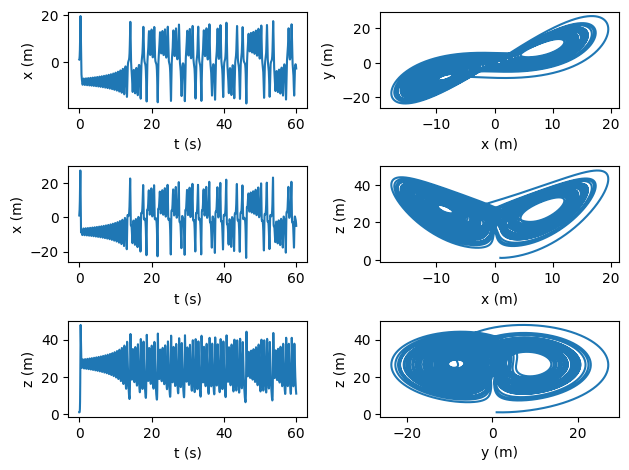

In [25]:
figure, axis = plt.subplots(3,2)
axis[0,0].plot(t, x, linestyle="-")
axis[0,0].set_xlabel("t (s)")
axis[0,0].set_ylabel("x (m)")
axis[0,1].plot(x, y, linestyle="-")
axis[0,1].set_xlabel("x (m)")
axis[0,1].set_ylabel("y (m)")

axis[1,0].plot(t, y, linestyle="-")
axis[1,0].set_xlabel("t (s)")
axis[1,0].set_ylabel("x (m)")
axis[1,1].plot(x, z, linestyle="-")
axis[1,1].set_xlabel("x (m)")
axis[1,1].set_ylabel("z (m)")

axis[2,0].plot(t, z, linestyle="-")
axis[2,0].set_xlabel("t (s)")
axis[2,0].set_ylabel("z (m)")
axis[2,1].plot(y, z, linestyle="-")
axis[2,1].set_xlabel("y (m)")
axis[2,1].set_ylabel("z (m)")

plt.tight_layout()
plt.show()